<a href="https://colab.research.google.com/github/rampravesh80/Dataset-for-Fire-Firearm/blob/main/Degrading_of_images_without_resizing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Updated code

In [ ]:
# ===============================================
# ✅ STEP 1: Install required packages
# ===============================================
!pip install pillow tqdm matplotlib


In [ ]:
# ===============================================
# ✅ STEP 2: Import libraries
# ===============================================
import os
import zipfile
import random
from PIL import Image, ImageFilter, ImageEnhance
from tqdm import tqdm
import matplotlib.pyplot as plt

In [ ]:
# ===============================================
# ✅ STEP 3: Upload the ZIP dataset
# ===============================================
from google.colab import files
uploaded = files.upload()

zip_filename = list(uploaded.keys())[0]

In [ ]:
# ===============================================
# ✅ STEP 4: Unzip the dataset
# ===============================================
extract_dir = "/content/dataset"
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Dataset extracted to: {extract_dir}")

In [10]:
# ===============================================
# ✅ STEP 5: Function to degrade images
# ===============================================

import numpy as np
import io
from PIL import Image, ImageFilter, ImageEnhance

def degrade_image(img):
    # 1️⃣ Blur
    img = img.filter(ImageFilter.GaussianBlur(radius=2))

    # 2️⃣ Brightness down
    enhancer = ImageEnhance.Brightness(img)
    img = enhancer.enhance(0.7)

    # 3️⃣ JPEG compression artifacts
    with io.BytesIO() as f:
        img.save(f, format='JPEG', quality=25)
        f.seek(0)
        img = Image.open(f).copy()   # ✅ force load while buffer is open!

    # 4️⃣ Add noise
    img_np = np.array(img)
    noise = np.random.normal(0, 15, img_np.shape).astype(np.int16)
    noisy_img = img_np.astype(np.int16) + noise
    noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)
    img = Image.fromarray(noisy_img)

    # 5️⃣ Random color tweak
    enhancer = ImageEnhance.Color(img)
    img = enhancer.enhance(np.random.uniform(0.5, 1.5))

    return img


In [11]:
# ===============================================
# ✅ STEP 6: Collect 4 random sample images (from train split)
# ===============================================
train_dir = os.path.join(extract_dir, "handguns_train_test_keggle_3567", "detect","images", "train")
all_train_images = [f for f in os.listdir(train_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

sample_images = random.sample(all_train_images, min(4, len(all_train_images)))

original_images = []
degraded_images = []

for img_name in sample_images:
    img_path = os.path.join(train_dir, img_name)
    img = Image.open(img_path)
    degraded = degrade_image(img.copy())
    original_images.append(img)
    degraded_images.append(degraded)

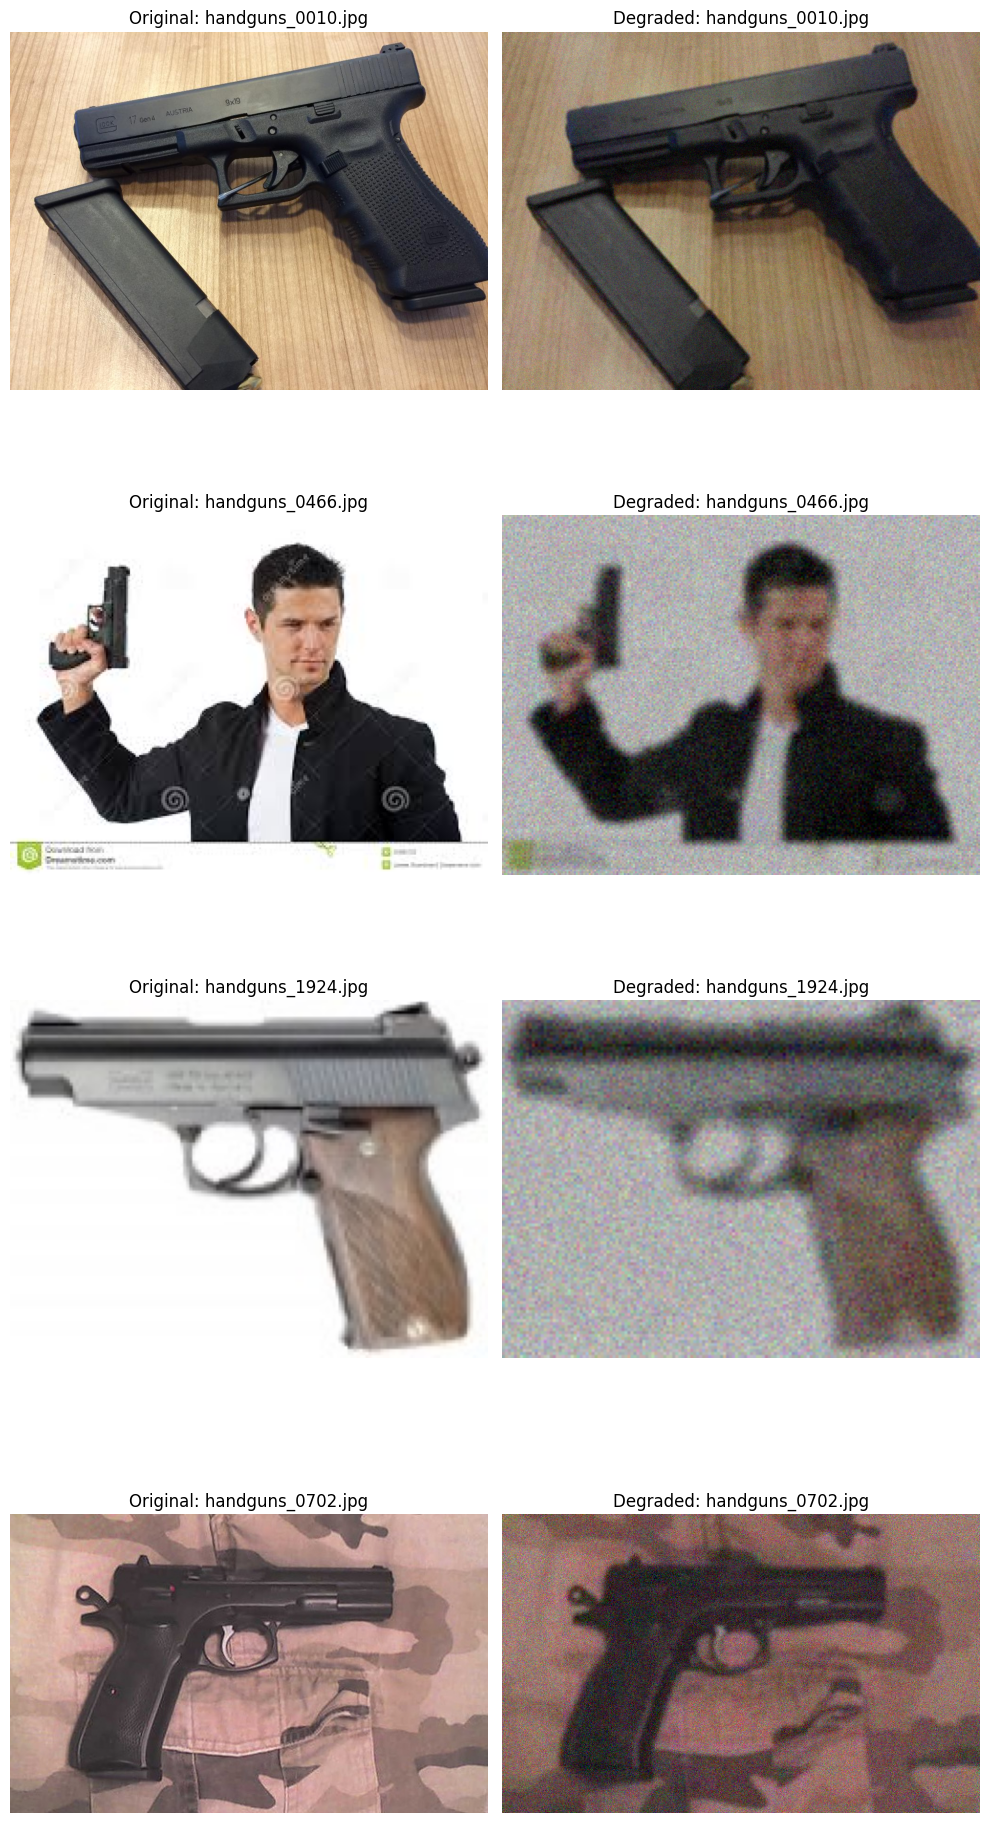

In [12]:
# ===============================================
# ✅ STEP 7: Show samples side by side
# ===============================================
fig, axes = plt.subplots(4, 2, figsize=(10, 20))

for i in range(len(sample_images)):
    axes[i,0].imshow(original_images[i])
    axes[i,0].set_title(f"Original: {sample_images[i]}")
    axes[i,0].axis('off')

    axes[i,1].imshow(degraded_images[i])
    axes[i,1].set_title(f"Degraded: {sample_images[i]}")
    axes[i,1].axis('off')

plt.tight_layout()
plt.show()

In [16]:
# ===============================================
# ✅ STEP 8: Process ALL images and save degraded versions
# ===============================================
splits = ["train", "test", "val"]
for split in splits:
    split_dir = os.path.join(extract_dir, "handguns_train_test_keggle_3567", "detect","images", split)
    if not os.path.exists(split_dir):
        continue

    image_files = [f for f in os.listdir(split_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    for image_file in tqdm(image_files, desc=f"Processing {split}"):
        image_path = os.path.join(split_dir, image_file)
        img = Image.open(image_path)
        degraded_img = degrade_image(img)
        degraded_img.save(image_path)

print("✅ All images degraded successfully!")

Processing val: 100%|██████████| 725/725 [01:19<00:00,  9.12it/s]

✅ All images degraded successfully!


In [17]:
# ===============================================
# ✅ STEP 9: Zip the processed dataset
# ===============================================
output_zip = "/content/degraded_dataset.zip"

def zipdir(path, ziph):
    for root, dirs, files in os.walk(path):
        for file in files:
            filepath = os.path.join(root, file)
            arcname = os.path.relpath(filepath, os.path.join(path, '..'))
            ziph.write(filepath, arcname)

with zipfile.ZipFile(output_zip, 'w', zipfile.ZIP_DEFLATED) as zipf:
    zipdir(extract_dir, zipf)

print(f"✅ Degraded dataset zipped at: {output_zip}")

✅ Degraded dataset zipped at: /content/degraded_dataset.zip


In [18]:
# ===============================================
# ✅ STEP 10: Download the output ZIP
# ===============================================
files.download(output_zip)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>